
# Utilisation du Machine Learning pour Prédire les Maladies Cardiaques

Dans ce projet, nous allons explorer l'utilisation d'algorithmes de machine learning pour prédire si un patient souffre d'une maladie cardiaque en nous basant sur ses caractéristiques médicales. Nous suivrons une méthodologie structurée, en commençant par la compréhension du problème et en terminant par l'évaluation de nos modèles.

Ce projet explorera le défi de la **classification des maladies cardiaques** afin d'expliquer quelques principes fondamentaux de la data analyst et du machine learning.

Il est conçu pour servir d'illustration complète de ce qu'un proof of concept en machine learning et data science pourrait inclure.

---

### **Dictionnaire des Données - Maladie Cardiaque**

| Feature | Description | Valeurs |
|---------|-------------|---------|
| **age** | Âge du patient (en années) | Numérique |
| **sex** | Sexe du patient | 1 = homme, 0 = femme |
| **cp** | Type de douleur thoracique | 0: Angine typique<br>1: Angine atypique<br>2: Douleur non-anginale<br>3: Asymptomatique |
| **trestbps** | Pression artérielle au repos (mm Hg) | Numérique |
| **chol** | Taux de cholestérol sérique (mg/dL) | Numérique |
| **fbs** | Glycémie à jeun | 1: > 120 mg/dL<br>0: ≤ 120 mg/dL |
| **restecg** | Résultats ECG au repos | 0: Normal<br>1: Anomalie onde ST-T<br>2: Hypertrophie ventriculaire gauche |
| **thalach** | Fréquence cardiaque maximale atteinte | Numérique |
| **exang** | Angine induite par l'exercice | 1: Oui, 0: Non |
| **oldpeak** | Dépression ST induite par l'exercice | Numérique |
| **slope** | Pente du segment ST à l'effort maximal | 0: Ascendante<br>1: Plate<br>2: Descendante |
| **ca** | Nombre de vaisseaux colorés par fluoroscopie | 0-4 |
| **thal** | Thalassémie | 0-3 |
| **target** | **Variable cible** - Maladie présente ou non | **1: Oui, 0: Non** |

---

In [1]:
#Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Modèles de Machine Learning
from sklearn.linear_model import LogisticRegression   # Régression logistique
from sklearn.neighbors import KNeighborsClassifier    # Classification par k-plus proches voisins  
from sklearn.ensemble import RandomForestClassifier   # Forêt aléatoire (ensemble d'arbres)

#Outils d'Évaluation des Modèles
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
df = pd.read_csv("heart_disease_.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00,1025.00
mean,54.43,0.70,0.94,131.61,246.00,0.15,0.53,149.11,0.34,1.07,1.39,0.75,2.32,0.51
std,9.07,0.46,1.03,17.52,51.59,0.36,0.53,23.01,0.47,1.18,0.62,1.03,0.62,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48.00,0.00,0.00,120.00,211.00,0.00,0.00,132.00,0.00,0.00,1.00,0.00,2.00,0.00
50%,56.00,1.00,1.00,130.00,240.00,0.00,1.00,152.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,275.00,0.00,1.00,166.00,1.00,1.80,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


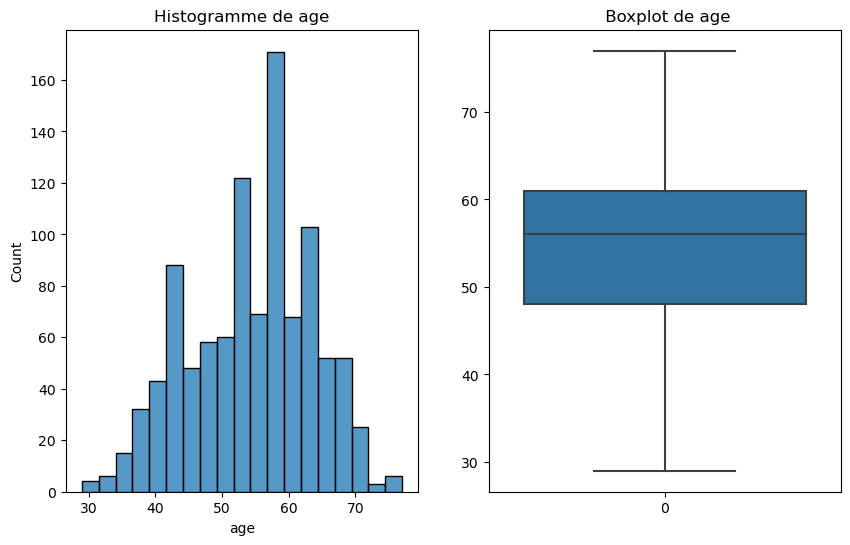

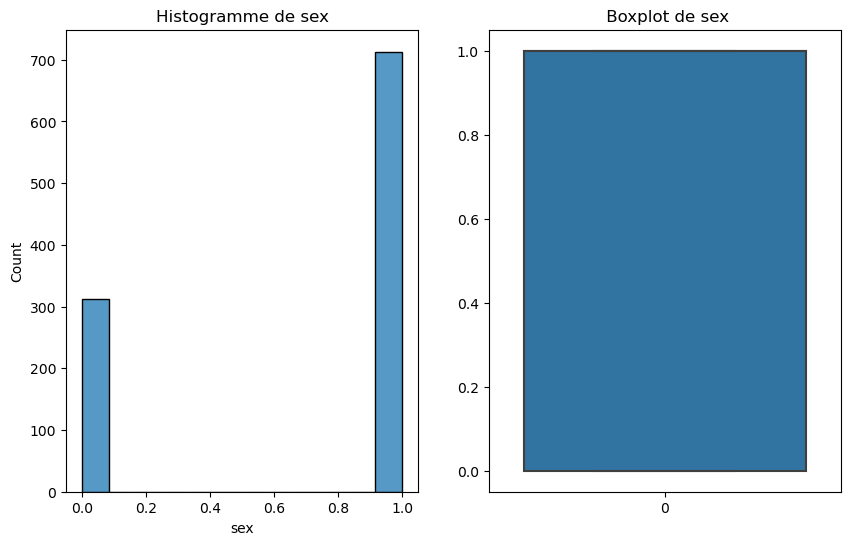

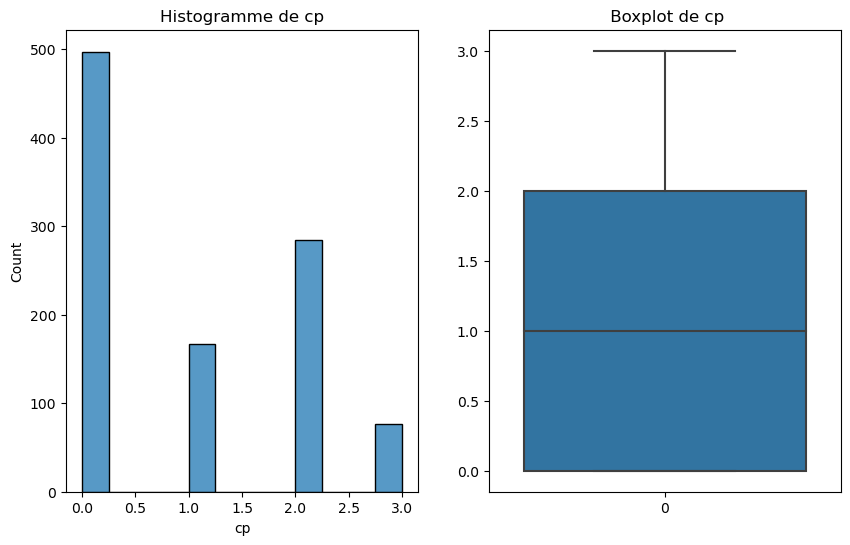

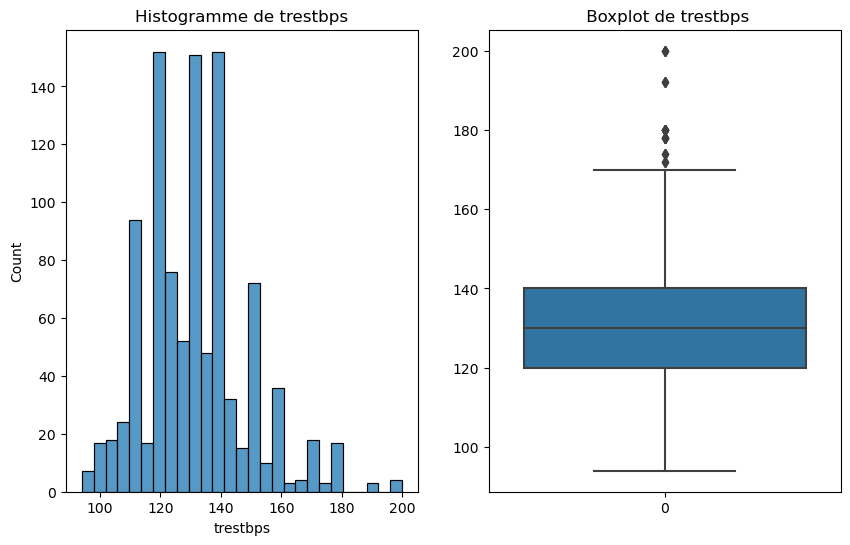

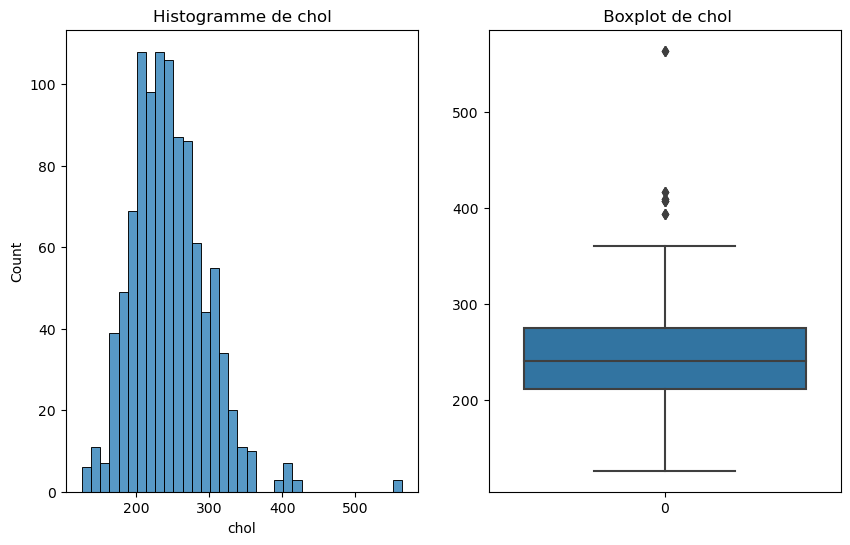

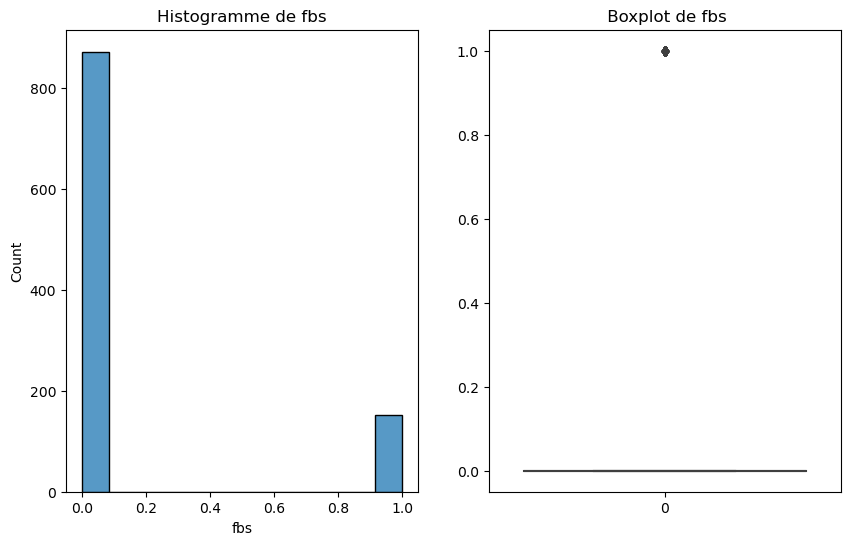

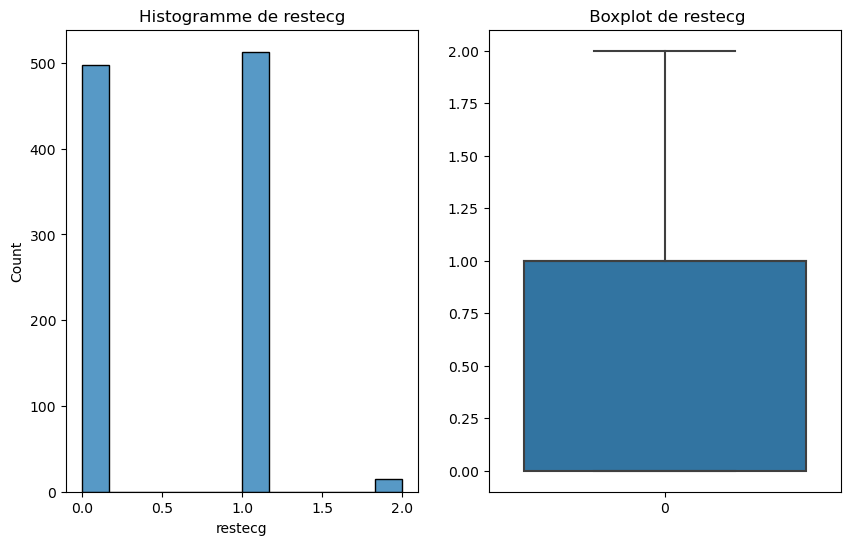

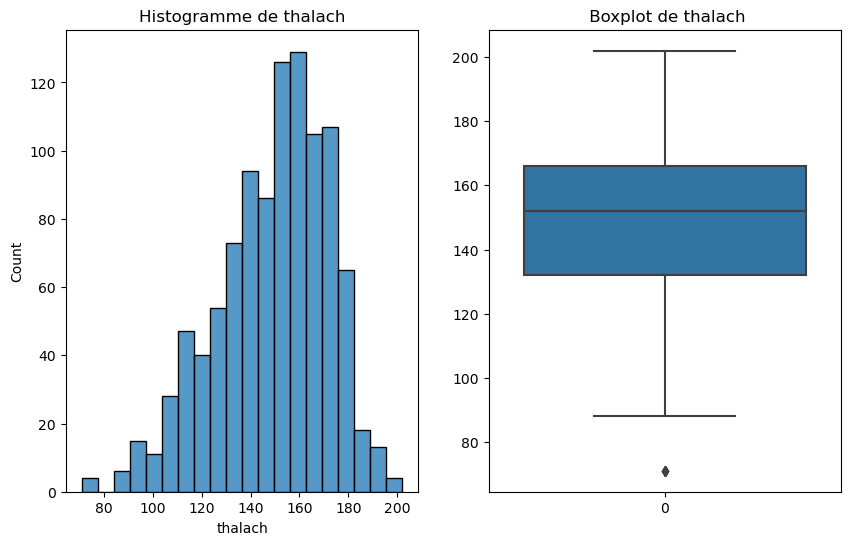

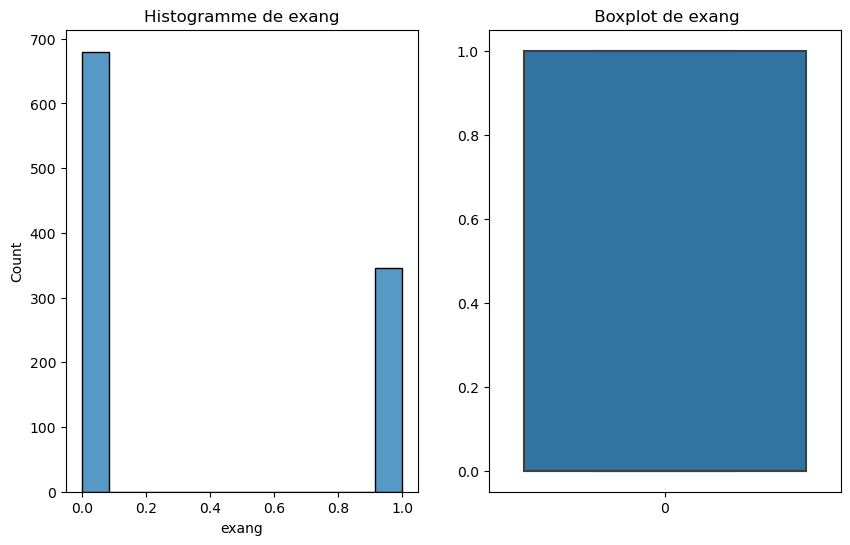

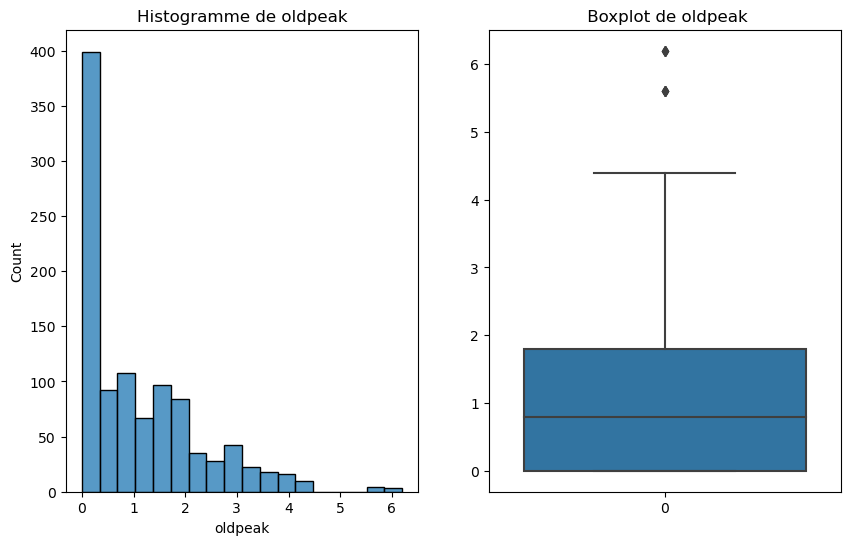

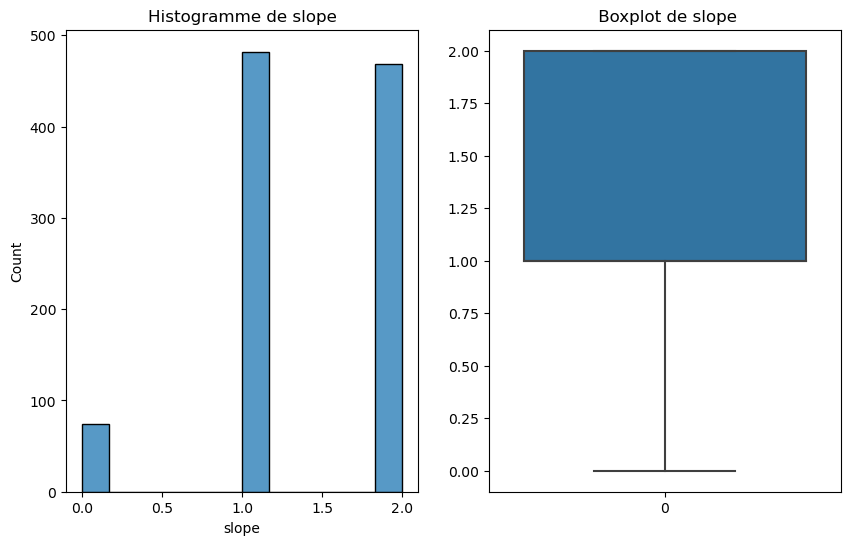

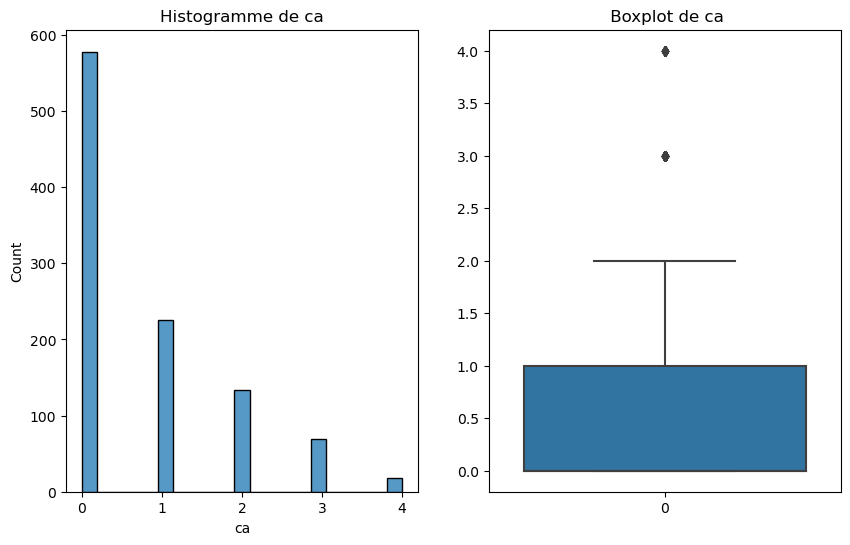

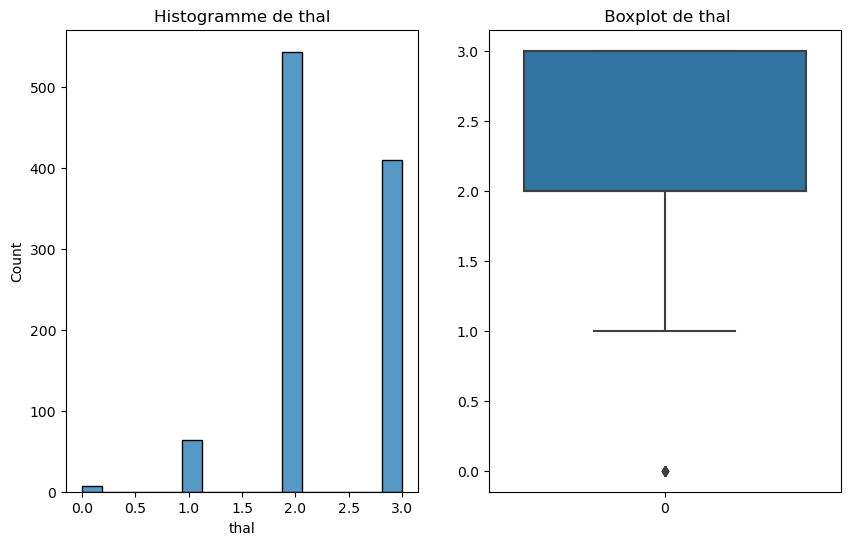

In [5]:
variables = df.columns.drop(['target']) # Vérification de la présence de valeurs aberrantes
for var in variables:
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    sns.histplot(df[var],kde=False)
    plt.title(f'Histogramme de {var}')
    
    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.title(f' Boxplot de {var}')
    plt.show()

Possibles valeurs aberrantes dans les variables : trestbps, chol et oldpeak. 
Après vérification avec l'évidence scientifique, on confirme qu'il n'y a pas de valeurs outliers.

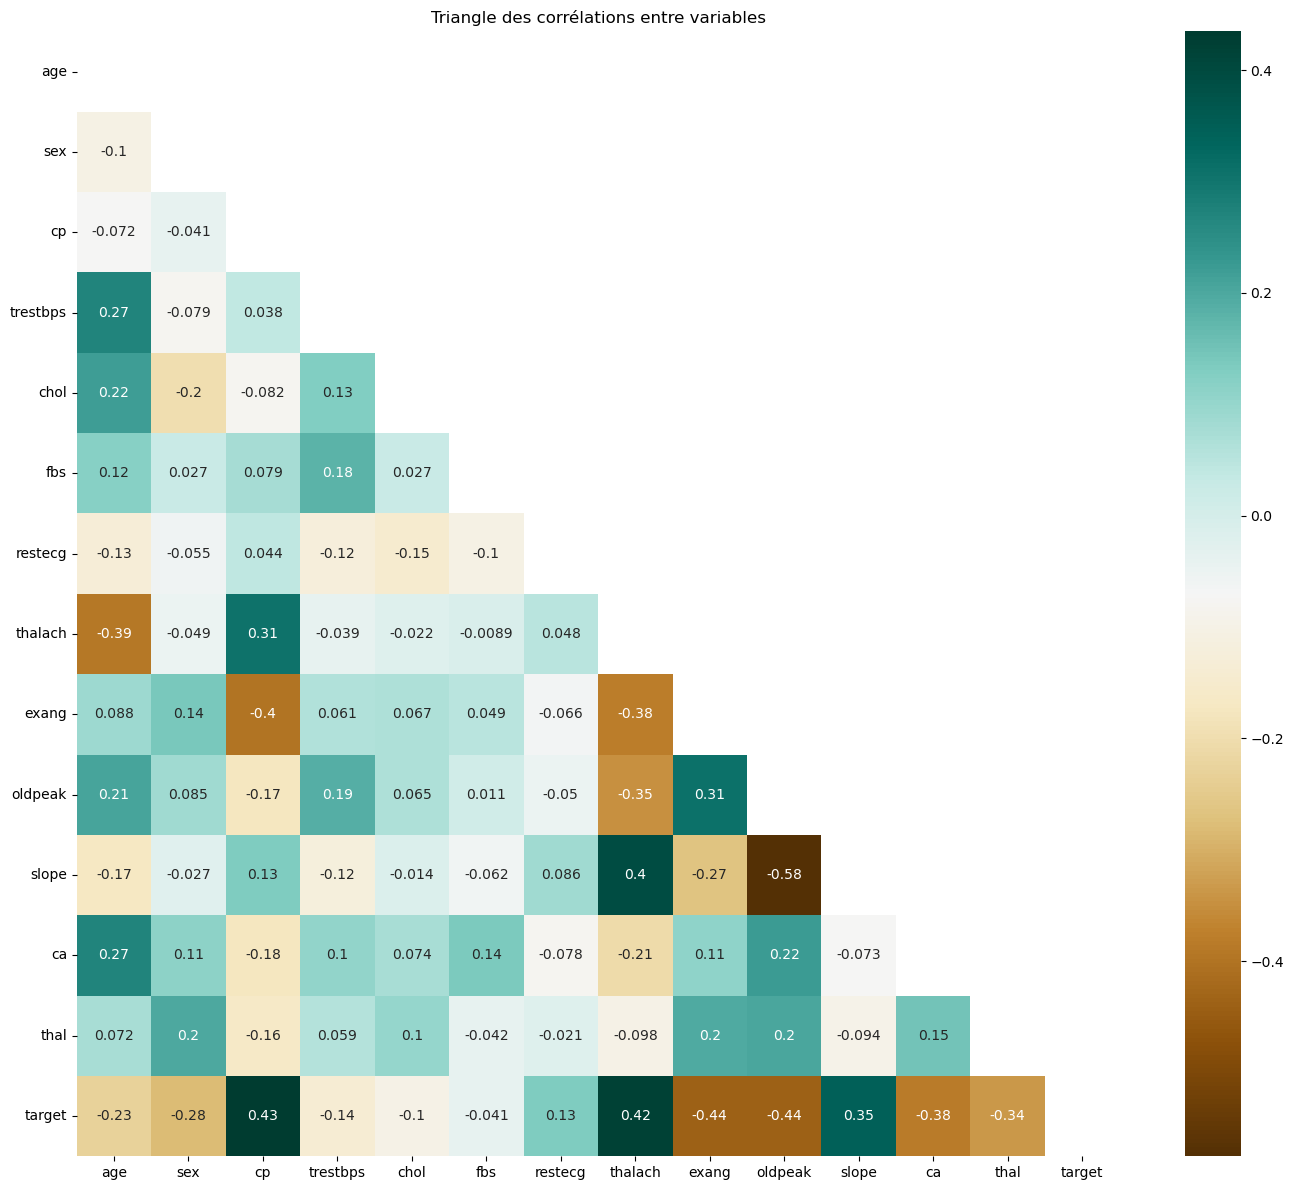

In [6]:
# Heatmap des corrélations

# Vérification de la présence de multicolinéarité entre les variables prédictives
matrix = df.corr()
mask = np.triu(np.ones_like(matrix))
plt.figure(figsize=(14, 12))
sns.heatmap(matrix, mask=mask, annot=True, cmap='BrBG')
plt.title('Triangle des corrélations entre variables')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [7]:
print(f'Correlations entre variables prédictives avec la variable cible ')
print('='*50)
print(df.corr()['target'].sort_values(ascending=False))

Correlations entre variables prédictives avec la variable cible 
target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64


Analyse des corrélations avec la variable target :
- Corrélations positives modérées : cp, thalach et slope sont associées à un risque accru de maladie cardiaque.
- Corrélations négatives modérées : thal, ca, exang et oldpeak sont associées à une diminution du risque. 

Étant donné qu’aucune corrélation n’excède le seuil absolu de 0,7 entre deux variables, on peut conclure qu’il n’y a pas de multicolinéarité significative dans le modèle.

In [8]:
# Distribution de la variable cible (target)
# Vérifions combien d'échantillons positifs (1 = maladie) et négatifs (0 = sain) on a dans notre DataFrame
print("Répartition des classes dans notre dataset :")
print("=" * 50)
distribution = df.target.value_counts().sort_index()
print(distribution)
print("\n Légende :")
print(f"   • Patients sains (0) : {distribution[0]} patients")
print(f"   • Patients malades (1) : {distribution[1]} patients")
print(f"   • Total : {distribution.sum()} patients dans l'étude")

Répartition des classes dans notre dataset :
0    499
1    526
Name: target, dtype: int64

 Légende :
   • Patients sains (0) : 499 patients
   • Patients malades (1) : 526 patients
   • Total : 1025 patients dans l'étude


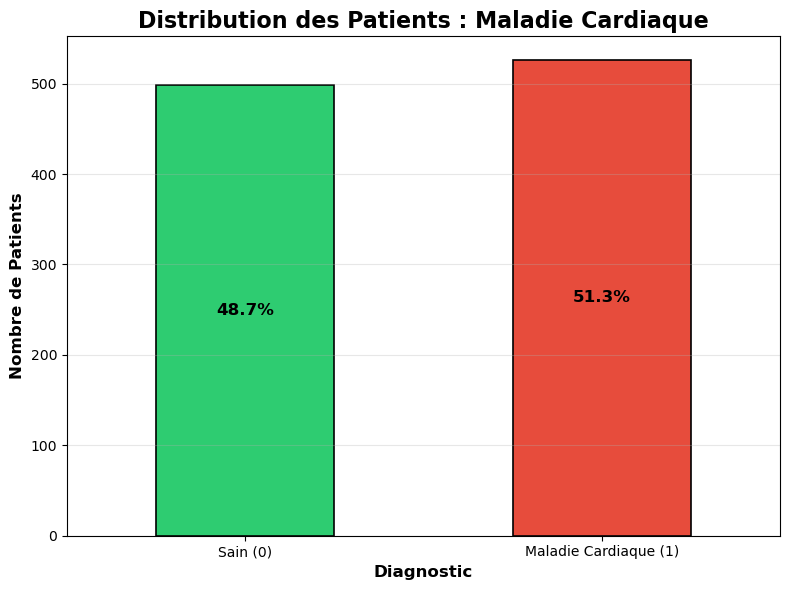

In [9]:
plt.figure(figsize=(8, 6))
target_counts = df.target.value_counts().sort_index()
total = target_counts.sum()

# Création du graphique en barres
bars = target_counts.plot(kind="bar", 
                         color=["#2ecc71", "#e74c3c"],
                         edgecolor="black",
                         linewidth=1.2)


# Ajout des étiquettes de pourcentage 
for i, (index, value) in enumerate(target_counts.items()):
    percentage = (value / total) * 100
    plt.text(i, value/2, f'{percentage:.1f}%', 
             ha='center', va='center', fontweight='bold', 
             fontsize=12, color='black')

plt.title("Distribution des Patients : Maladie Cardiaque", fontsize=16, fontweight='bold')
plt.xlabel("Diagnostic", fontsize=12, fontweight='bold')
plt.ylabel("Nombre de Patients", fontsize=12, fontweight='bold')
plt.xticks([0, 1], ["Sain (0)", "Maladie Cardiaque (1)"], rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
print("TABLEAU CROISÉ DYNAMIQUE : Target vs Sex")
print("=" * 55)

# Création du tableau de contingence avec marges (totaux)
tableau_croise = pd.crosstab(df.target, df.sex, margins=True, margins_name="Total")

# Affichage du tableau brut avec totaux
print("\n--- Tableau de fréquences absolues ---")
print(tableau_croise)

# Pourcentage par ligne
print("\n--- Pourcentages par ligne (%) ---")
pourcent_ligne = pd.crosstab(df.target, df.sex, normalize='index') * 100
pourcent_ligne['Total'] = pourcent_ligne.sum(axis=1)
pourcent_ligne.loc['Total'] = pourcent_ligne.sum()
print(pourcent_ligne.round(1))

# Pourcentage par colonne
print("\n--- Pourcentages par colonne (%) ---")
pourcent_colonne = pd.crosstab(df.target, df.sex, normalize='columns') * 100
pourcent_colonne.loc['Total'] = pourcent_colonne.sum()
pourcent_colonne['Total'] = pourcent_colonne.sum(axis=1)
print(pourcent_colonne.round(1))

# Légende
print("\nLégende :")
print(" • Lignes (target) : 0 = Sain, 1 = Maladie cardiaque")
print(" • Colonnes (sex)  : 0 = Femme, 1 = Homme")


TABLEAU CROISÉ DYNAMIQUE : Target vs Sex

--- Tableau de fréquences absolues ---
sex       0    1  Total
target                 
0        86  413    499
1       226  300    526
Total   312  713   1025

--- Pourcentages par ligne (%) ---
sex        0      1  Total
target                    
0       17.2   82.8  100.0
1       43.0   57.0  100.0
Total   60.2  139.8  200.0

--- Pourcentages par colonne (%) ---
sex         0      1  Total
target                     
0        27.6   57.9   85.5
1        72.4   42.1  114.5
Total   100.0  100.0  200.0

Légende :
 • Lignes (target) : 0 = Sain, 1 = Maladie cardiaque
 • Colonnes (sex)  : 0 = Femme, 1 = Homme


La distribution femmes -homme dans le dataset c'est: 30,44% femmmes, 69,56% hommes.
Le percentage de malade par sexe c'est du 43% de femmes et 57% d'hommmes.
Du totale de femmes le 72,4% sont malades.
Par contre les hommes seulement un 42,1% sont malades cardiaques.

<Figure size 1200x800 with 0 Axes>

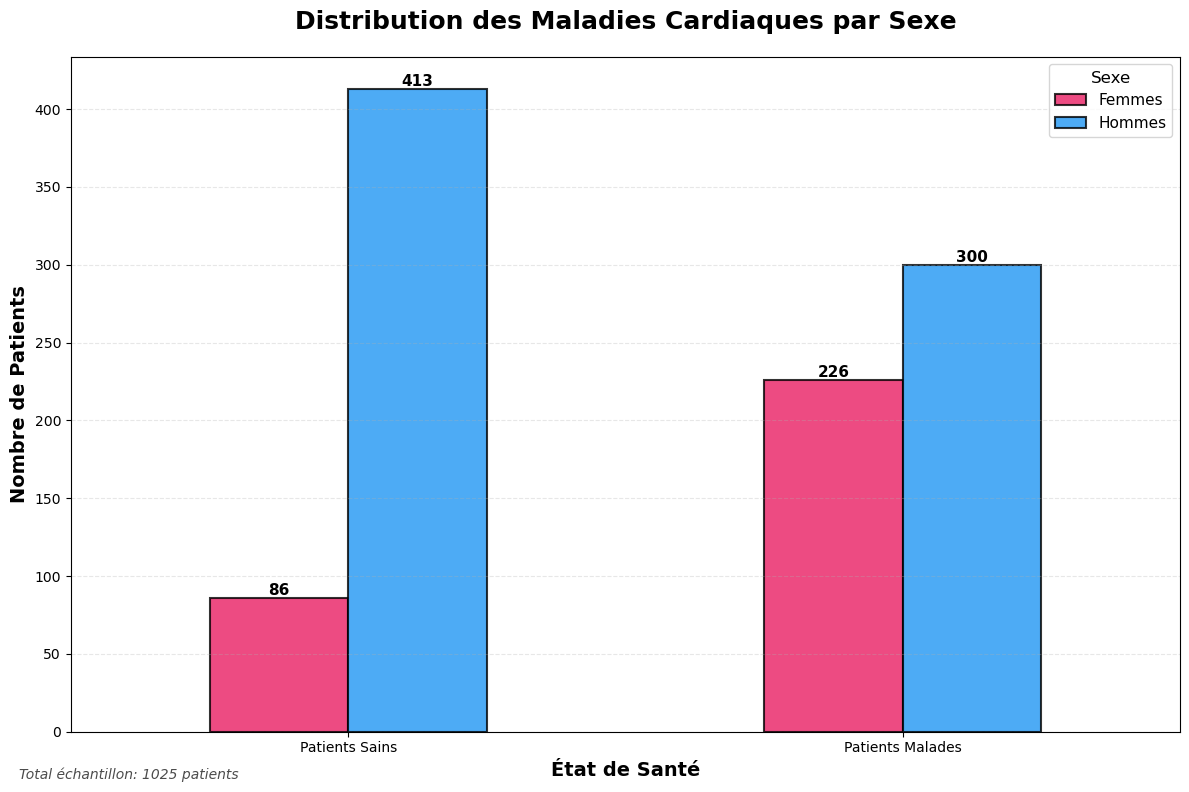

In [11]:
# Visualisation croisée : Maladie Cardiaque vs Sexe
plt.figure(figsize=(12, 8))

# Création du tableau croisé avec labels explicites
crosstab_data = pd.crosstab(df.target, df.sex)
crosstab_data.index = ['Patients Sains', 'Patients Malades']
crosstab_data.columns = ['Femmes', 'Hommes']

# Création du diagramme en barres
ax = crosstab_data.plot(kind="bar", 
                        figsize=(12, 8),
                        color=["#e91e63", "#2196f3"],  # Rose pour femmes, bleu pour hommes
                        edgecolor="black",
                        linewidth=1.5,
                        alpha=0.8)

# Ajout des valeurs sur les barres
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontweight='bold', fontsize=11)


plt.title("Distribution des Maladies Cardiaques par Sexe", 
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel("État de Santé", fontsize=14, fontweight='bold')
plt.ylabel("Nombre de Patients", fontsize=14, fontweight='bold')
plt.legend(title="Sexe", title_fontsize=12, fontsize=11, loc='upper right')

# Rotation et grille
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Taille échantillon
total_patients = len(df)
plt.figtext(0.02, 0.02, f"Total échantillon: {total_patients} patients", 
            fontsize=10, style='italic', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

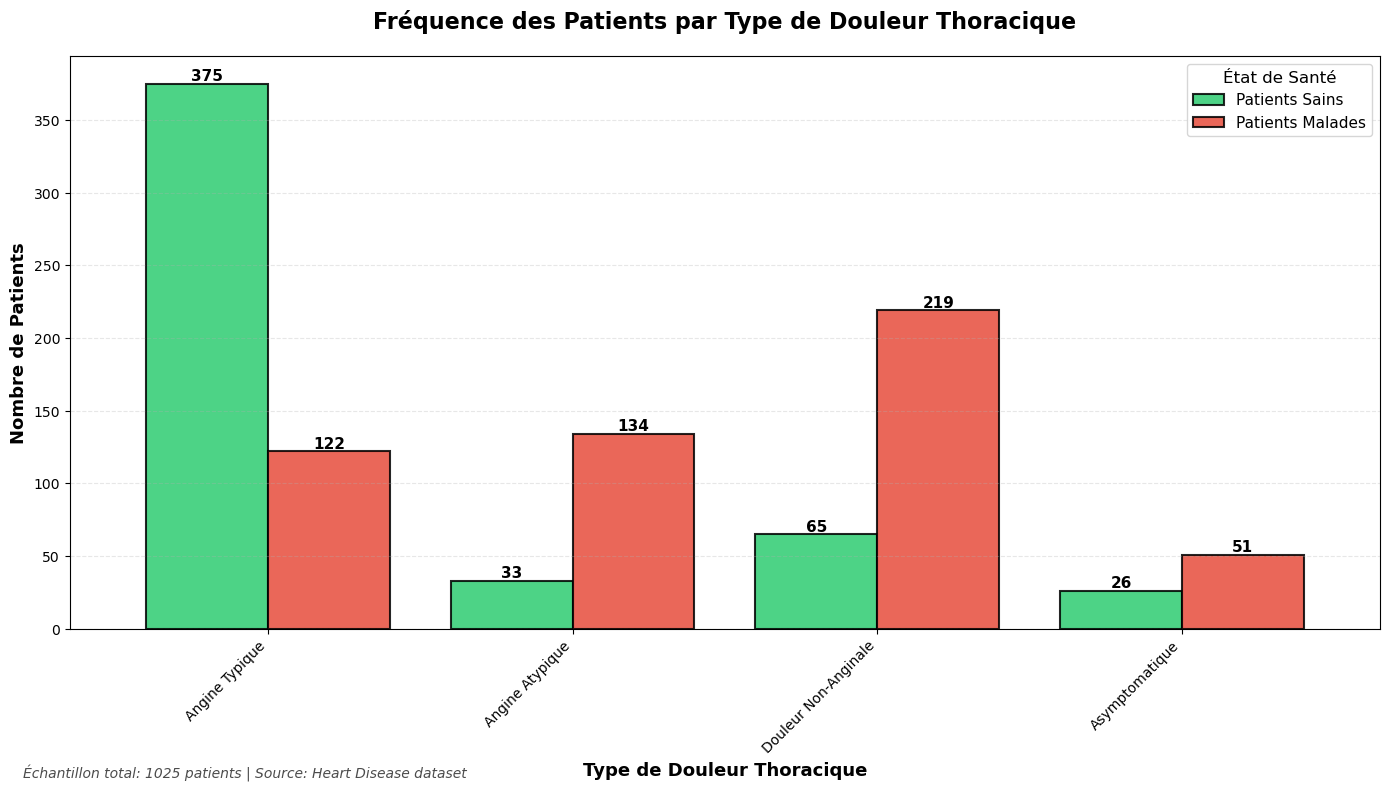

In [12]:
# Analyse croisée : Type de Douleur Thoracique vs Maladie Cardiaque
plt.figure(figsize=(14, 8))

# Création du tableau croisé avec labels explicites
crosstab_cp = pd.crosstab(df.cp, df.target)

# Mapping des types de douleur thoracique (plus parlant pour l'analyse !)
cp_labels = {
    0: "Angine Typique",
    1: "Angine Atypique", 
    2: "Douleur Non-Anginale",
    3: "Asymptomatique"
}

# Application des labels
crosstab_cp.index = [cp_labels[i] for i in crosstab_cp.index]
crosstab_cp.columns = ['Patients Sains', 'Patients Malades']

# Graphique avec couleurs médicalement cohérentes
ax = crosstab_cp.plot(kind="bar", 
                      figsize=(14, 8),
                      color=["#2ecc71", "#e74c3c"],  # Vert pour sain, rouge pour maladie
                      edgecolor="black",
                      linewidth=1.5,
                      alpha=0.85,
                      width=0.8)

# Ajout des valeurs sur chaque barre
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontweight='bold', fontsize=11)


plt.title("Fréquence des Patients par Type de Douleur Thoracique", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Type de Douleur Thoracique", fontsize=13, fontweight='bold')
plt.ylabel("Nombre de Patients", fontsize=13, fontweight='bold')
plt.legend(title="État de Santé", title_fontsize=12, fontsize=11, loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajout d'informations contextuelles
total_patients = len(df)
plt.figtext(0.02, 0.02, f"Échantillon total: {total_patients} patients | Source: Heart Disease dataset", 
            fontsize=10, style='italic', alpha=0.7)

plt.tight_layout()
plt.show()

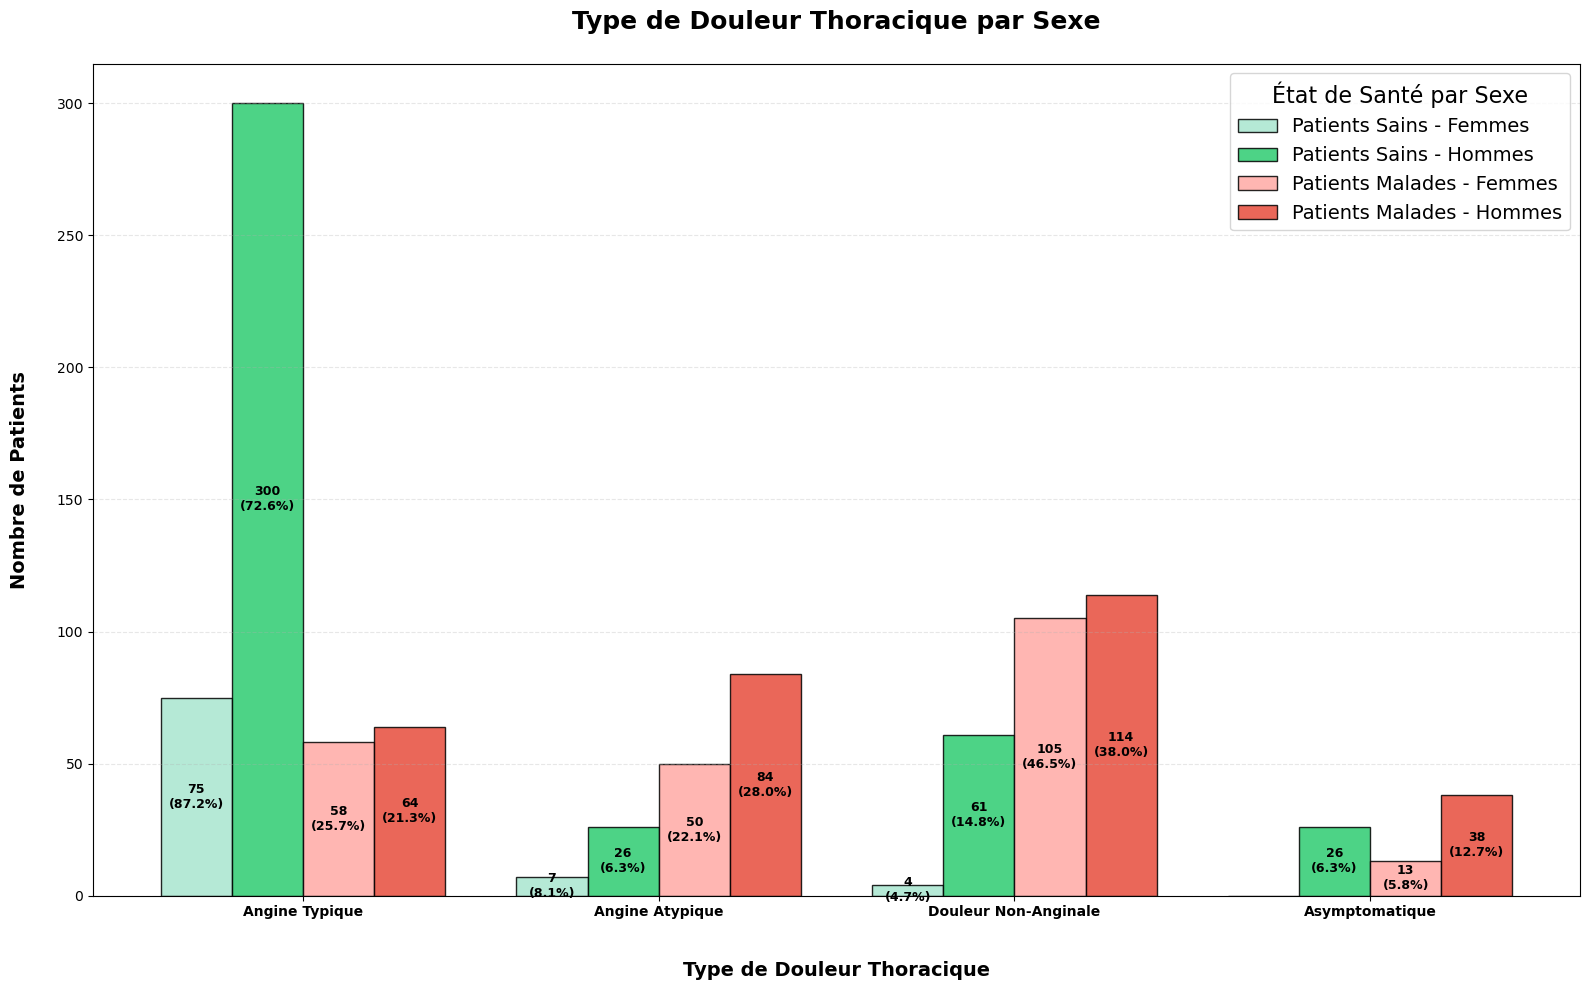

In [14]:
# Représentation du même graphique que précédemment, en ajoutant la variable 'sexe' pour affiner l'analyse.

# Création du tableau croisé à trois dimensions
# On groupe par cp et sex, puis on compte les target
crosstab_3d = df.groupby(['cp', 'sex', 'target']).size().unstack(fill_value=0)


# Définir les types de douleur thoracique et positions x
cp_types = sorted(df['cp'].unique())
x_pos = range(len(cp_types))
bar_width = 0.2

# Mapping des types de douleur thoracique
cp_labels = {
    0: "Angine Typique",
    1: "Angine Atypique", 
    2: "Douleur Non-Anginale",
    3: "Asymptomatique"
}

# Mapping du sexe
sex_labels = {0: "Femmes", 1: "Hommes"}

# Couleurs pour chaque combinaison
color_map = {
    ('Patients Sains', 'Femmes'): '#a8e6cf',
    ('Patients Sains', 'Hommes'): '#2ecc71',
    ('Patients Malades', 'Femmes'): '#ffaaa5',
    ('Patients Malades', 'Hommes'): '#e74c3c'
}

# Création du graphique
fig, ax = plt.subplots(figsize=(16, 10))

# Boucle pour tracer les barres
for i, target in enumerate([0, 1]):
    for j, sex in enumerate([0, 1]):
        values = []
        percentages = []
        total_sex_target = len(df[(df.sex == sex) & (df.target == target)])
        
        for cp in cp_types:
            count = len(df[(df.cp == cp) & (df.sex == sex) & (df.target == target)])
            values.append(count)
            pct = (count / total_sex_target * 100) if total_sex_target > 0 else 0
            percentages.append(pct)
        
        pos = [x + (i*2 + j - 1.5) * bar_width for x in x_pos]
        target_label = 'Patients Sains' if target == 0 else 'Patients Malades'
        sex_label = sex_labels[sex]
        color = color_map[(target_label, sex_label)]
        label = f"{target_label} - {sex_label}"
        
        bars = ax.bar(pos, values, bar_width, color=color, edgecolor='black',
                      linewidth=1, alpha=0.85, label=label)
        
        for k, (bar, value, pct) in enumerate(zip(bars, values, percentages)):
            if value > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2,
                        f'{value}\n({pct:.1f}%)', ha='center', va='center',
                        fontweight='bold', fontsize=9, color='black')

# Configuration du graphique
ax.set_title("Type de Douleur Thoracique par Sexe", fontsize=18, fontweight='bold', pad=25)
ax.set_xlabel("Type de Douleur Thoracique", fontsize=14, fontweight='bold', labelpad=30)
ax.set_ylabel("Nombre de Patients", fontsize=14, fontweight='bold', labelpad=20)
ax.set_xticks(x_pos)
ax.set_xticklabels([cp_labels[cp] for cp in cp_types], rotation=0, fontsize=10, fontweight='bold')
ax.legend(title="État de Santé par Sexe", title_fontsize=16, fontsize=14, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

Les hommes sains présentent massivement des angines typiques (299 patients, 72.6%), confirmant le pattern classique masculin de douleur thoracique. Paradoxalement, les hommes malades souffrent davantage de douleurs non-angineuses (114 patients, 38.0%), suggérant que les symptômes atypiques ne doivent pas être négligés.

Chez les femmes malades, les douleurs non-angineuses dominent également (105 patientes, 46.5%), indiquant une présentation symptomatique souvent atypique. 

In [15]:
# Déclaration des les variables features et de la target
X = df.drop("target", axis=1)  # Variables indépendantes (features)
y = df.target.values           # Variable dépendante (target)

# Séparation train/test 80%/20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Modèles à utiliser 
models = {
    "KNN": KNeighborsClassifier(
        n_neighbors=5,
        weights='uniform',
        metric='euclidean'
    ),
    "Logistic Regression": LogisticRegression(
        random_state=42,
        max_iter=1000,  # Évite les warnings de convergence
        solver='liblinear'  # Optimal pour petits datasets
    ), 
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=None,
        min_samples_split=2
    )
}

def fit_and_score_ameliore(models, X_train, X_test, y_train, y_test):
    # Seed pour la reproductibilité
    np.random.seed(42)
    
    # Dictionnaire pour stocker tous les résultats
    resultats_complets = {}
    
    print("\n ENTRAÎNEMENT ET ÉVALUATION DES MODÈLES :")
    print("-" * 50)
    
    # Boucle d'entraînement pour chaque modèle
    for nom_modele, modele in models.items():
        print(f"\n Entraînement du modèle : {nom_modele}")
        
        # Entraînement du modèle
        modele.fit(X_train, y_train)
        
        # Prédictions
        y_pred_train = modele.predict(X_train)
        y_pred_test = modele.predict(X_test)
        
        # Calcul des métriques
        accuracy_train = modele.score(X_train, y_train)
        accuracy_test = modele.score(X_test, y_test)
        precision_test = precision_score(y_test, y_pred_test)
        recall_test = recall_score(y_test, y_pred_test)
        f1_test = f1_score(y_test, y_pred_test)
        
        # Stockage des résultats
        resultats_complets[nom_modele] = {
            'accuracy_train': accuracy_train,
            'accuracy_test': accuracy_test,
            'precision': precision_test,
            'recall': recall_test,
            'f1_score': f1_test,
            'overfitting': accuracy_train - accuracy_test
        }
        
        # Affichage des résultats
        print(f"  - Accuracy (train): {accuracy_train:.4f}")
        print(f"  - Accuracy (test) : {accuracy_test:.4f}")
        print(f"  - Precision       : {precision_test:.4f}")
        print(f"  - Recall          : {recall_test:.4f}")
        print(f"  - F1-Score        : {f1_test:.4f}")
        
        # Détection d'overfitting
        overfitting = accuracy_train - accuracy_test
        if overfitting > 0.1:
            print(f"\n   -->  Overfitting détecté : {overfitting:.4f}")
        else:
            print(f"\n   -->  Pas d'overfitting : {overfitting:.4f}")
    
    return resultats_complets

# Exécution de l'entraînement
resultats = fit_and_score_ameliore(models, X_train, X_test, y_train, y_test)


 ENTRAÎNEMENT ET ÉVALUATION DES MODÈLES :
--------------------------------------------------

 Entraînement du modèle : KNN
  - Accuracy (train): 0.9232
  - Accuracy (test) : 0.7317
  - Precision       : 0.7308
  - Recall          : 0.7379
  - F1-Score        : 0.7343

   -->  Overfitting détecté : 0.1915

 Entraînement du modèle : Logistic Regression
  - Accuracy (train): 0.8695
  - Accuracy (test) : 0.7854
  - Precision       : 0.7438
  - Recall          : 0.8738
  - F1-Score        : 0.8036

   -->  Pas d'overfitting : 0.0841

 Entraînement du modèle : Random Forest
  - Accuracy (train): 1.0000
  - Accuracy (test) : 0.9854
  - Precision       : 1.0000
  - Recall          : 0.9709
  - F1-Score        : 0.9852

   -->  Pas d'overfitting : 0.0146


C:\Users\natxo\AppData\Local\Temp\ipykernel_12064\4060405422.py:27: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  plt.tight_layout()
C:\Users\natxo\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


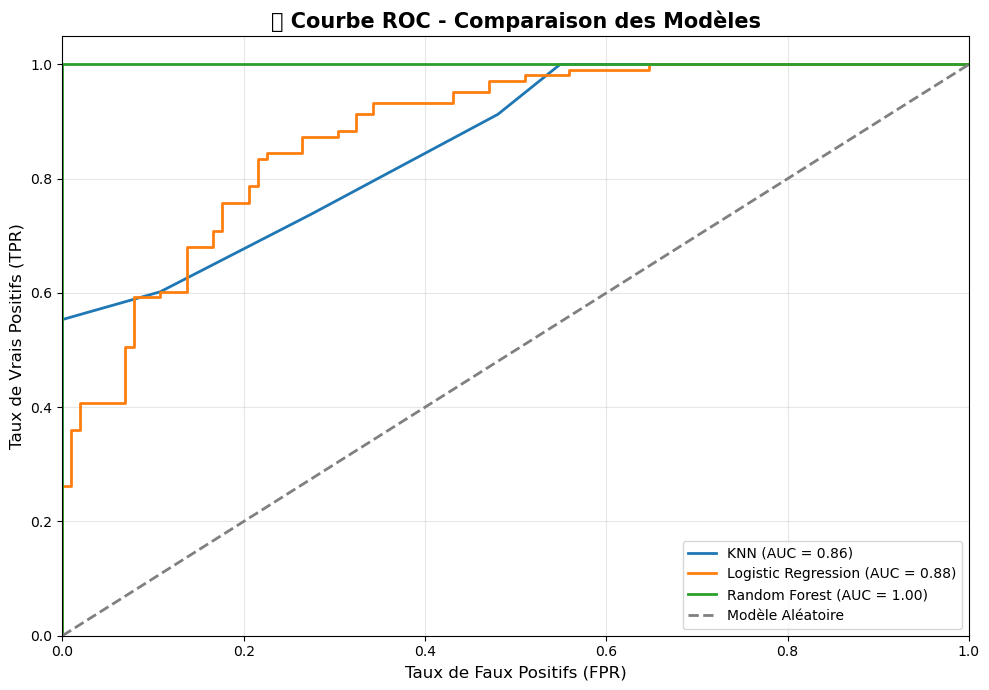

In [17]:
# Initialiser le graphique
plt.figure(figsize=(10, 7))

# Boucle sur chaque modèle
for nom_modele in ["KNN", "Logistic Regression", "Random Forest"]:
    modele = models[nom_modele]
    
    # Vérifier si le modèle a predict_proba (KNN, RF, LR oui)
    if hasattr(modele, "predict_proba"):
        y_proba = modele.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, lw=2, label=f'{nom_modele} (AUC = {roc_auc:.2f})')

# Diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Modèle Aléatoire')

# Mise en forme du graphique
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR)', fontsize=12)
plt.title('🎯 Courbe ROC - Comparaison des Modèles', fontsize=15, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [18]:
def afficher_comparaison_multimetriques(resultats_complets):
    """
    Affiche uniquement le graphique de comparaison des métriques : accuracy, precision, recall, f1
    """
    df_performances = pd.DataFrame(resultats_complets).T
    metriques_cles = ['accuracy_test', 'precision', 'recall', 'f1_score']
    df_affichage = df_performances[metriques_cles]

    # Création du graphique
    plt.figure(figsize=(10, 6))
    df_affichage.plot(kind='bar', 
                      color=['#e74c3c', '#f39c12', '#2ecc71', '#9b59b6'],
                      alpha=0.85, edgecolor='black')
    
    plt.title("Comparaison Multi-Métriques", fontweight='bold', fontsize=16)
    plt.ylabel("Score")
    plt.ylim(0, 1.1)
    plt.legend(title="Métriques", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


<Figure size 1000x600 with 0 Axes>

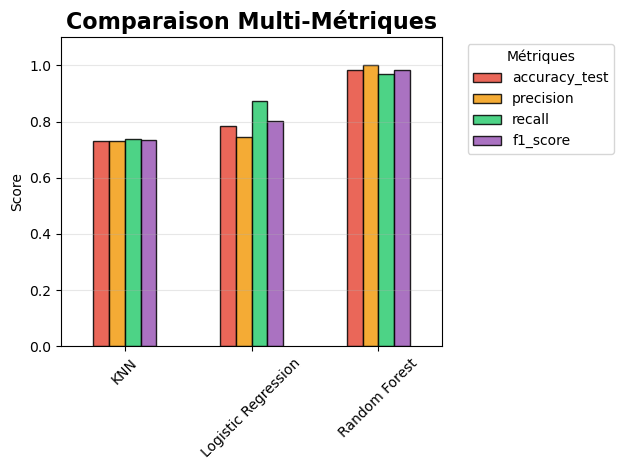

In [20]:
afficher_comparaison_multimetriques(resultats)

Sur la base des résultats obtenus, il est possible de conclure que le modèle Random Forest est celui qui représente le mieux la réalité selon l’ensemble des métriques évaluées.